In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PATH_CALIBRE = 'c:/Users/milen/Biblioteca de calibre/'
lang = "ES"  # >>>

In [ ]:
# [print(x) for x in elige_libros_aleatorios(1)]

# 1 Selección de libros

## a) Un libro en particular

In [ ]:
one_book = True

In [ ]:
# i) por el más reciente
last, all_ = seleccion_txt(PATH_CALIBRE)
book = get_filename(last[0], True)
book

In [ ]:
# ii) alternativamente, por patrón
# pat='Huasca'#<<<<<<
# book=[get_filename(x, True) for x in all_ if pat in x][0]
# book

In [ ]:
file = [x for x in all_ if book in x]

### a.1) libros de referencia para hacer el tf-idf

In [ ]:
date_es = 20220703 if lang == 'EN' else 20200504
files_es, _ = seleccion_txt(PATH_CALIBRE, fecha=date_es)
files = file + files_es
doc_list = [txt_read(x) for x in files]

## b) De última extracción calibre

In [6]:
from utils import get_books
doc_list, files = get_books(PATH_CALIBRE)
# files

** La ultima fecha de ficheros es:  20231015
                                                    0
0     Por que mentimos_. en especial - Dan Ariely.txt
1                  Metro 2033 - Dmitry Glukhovsky.txt
2    La Araucana - Don Alonso De Ercilla y Zuniga.txt
3             Cuentos completos - Edgar Allan Poe.txt
4                        Eureka - Edgar Allan Poe.txt
5   Los crimenes de la rue Morgue - Edgar Allan Po...
6      Asi hablo Zaratustra - Friedrich Nietzsche.txt
7           Ante todo no hagas dano - Henry Marsh.txt
8                              La Iliada - Homero.txt
9                              La Odisea - Homero.txt
10               Los ninos del Brasil - Ira Levin.txt
11                       Ygdrasil - Jorge Baradit.txt
12               Don Juan Tenorio - Jose Zorrilla.txt
13    El Capital (P. Scaron) Libro te - Karl Marx.txt
14  Electrodinamica cuantica - Richard P. Feynman.txt
15       Seis piezas faciles - Richard P. Feynman.txt
16  _Que te importa lo que piensen - 

# 2 Fakes
Creación de título y autor falso

In [8]:
from utils_textmining import get_word_matrix
vector_matrix, vocab, _ = get_word_matrix(doc_list) # tfidf

c:\Users\milen\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [9]:
from utils import get_fakes
dic_fake, di_counts = get_fakes(doc_list, files, vector_matrix, vocab, lang, openAI=True)


** Iniciando: Get fakes
** Generando título con OpenAI
      Título generado:  El engaño en los experimentos sociales: dólares y trampas
  El engaño en los experimentos sociales: dólares y trampas (Por que mentimos_. en especial a no)
** Generando título con OpenAI
      Título generado:  Túnel de estaciones: El metro que miró preguntó
  Túnel de estaciones: El metro que miró preguntó (Metro 2033)
** Generando título con OpenAI
      Título generado:  Armas bárbaro: furia en el canto gratis
  Armas bárbaro: furia en el canto gratis (La Araucana)
** Generando título con OpenAI
      Título generado:  Globo en el aposento: El relato del caballero
  Globo en el aposento: El relato del caballero (Cuentos completos)
** Generando título con OpenAI
      Título generado:  La tendencia de los átomos en el universo
  La tendencia de los átomos en el universo (Eureka)
** Generando título con OpenAI
      Título generado:  Crimen francés: Voces agudas desde el cuarto piso
  Crimen francés: Voces

In [ ]:
if one_book:
    dic_fake = {0: dic_fake[0]}

In [11]:
# revisamos:
import pandas as pd
pd.DataFrame.from_dict(dic_fake)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
author,Dan Ariely,Dmitry Glukhovsky,Don Alonso De Ercilla y Zuniga,Edgar Allan Poe,Edgar Allan Poe,Edgar Allan Poe,Friedrich Nietzsche,Henry Marsh,Homero,Homero,...,Jose Zorrilla,Karl Marx,Richard P. Feynman,Richard P. Feynman,Richard P. Feynman,Rosa Montero,Sir Arthur Conan Doyle,Steven Pinker,Tim Harford,Victor Hugo
title,Por que mentimos_. en especial a no,Metro 2033,La Araucana,Cuentos completos,Eureka,Los crimenes de la rue Morgue,Asi hablo Zaratustra,Ante todo no hagas dano,La Iliada,La Odisea,...,Don Juan Tenorio,El Capital (P. Scaron) Libro tercer,Electrodinamica cuantica,Seis piezas faciles,_Que te importa lo que piensen los,Lagrimas en la lluvia,El mundo perdido (edicion ilustrada,La tabla rasa_ La negacion moderna,El economista camuflado ataca de nu,Los Miserables
fakeAuthor,Universidad David,Artyom Stalker,Araucana Zuñiga,Mr John,Madler Dios,Morgue Dupin,Véase Nietzsche,Ucrania Mike,Aquiles Héctor,Odiseo Eumeo,...,Juan Oh,Economy Smith,Fig Figura,Tierra P2,Nasa Arlene,Tierra Nopal,Londres Dios,Harris New,Gobiernos Internet,Valjean Marius
fakeTitle,El engaño en los experimentos sociales: dólare...,Túnel de estaciones: El metro que miró preguntó,Armas bárbaro: furia en el canto gratis,Globo en el aposento: El relato del caballero,La tendencia de los átomos en el universo,Crimen francés: Voces agudas desde el cuarto piso,La Caverna de la Sabiduría Habló: La Virtud de...,"Operación cerebral: Pacientes, tumor y cirugía...",Las Naves Divinas: Combate de Dioses Valientes,El Palacio de los Dioses: Oh Nave de Ánimo,...,La estatua del capitán: un lance sepulcral,Capital y renta: Los secretos de la ganancia,Flechas de cristal: Una teoría cuántica fascin...,Teoría de partículas: La energía cuántica de á...,Informe de motores: Problemas y soluciones,Móvil en pantalla: el inspector miró,El Profesor y el Señor de los Monos,La Naturaleza Humana: Una Perspectiva Social,Dólares y precios: El mercado de las ganancias,La niña respondió al anciano en la sala
path,c:/Users/milen/Biblioteca de calibre\Dan Ariel...,c:/Users/milen/Biblioteca de calibre\Dmitry Gl...,c:/Users/milen/Biblioteca de calibre\Don Alons...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Edgar All...,c:/Users/milen/Biblioteca de calibre\Friedrich...,c:/Users/milen/Biblioteca de calibre\Henry Mar...,c:/Users/milen/Biblioteca de calibre\Homero\La...,c:/Users/milen/Biblioteca de calibre\Homero\La...,...,c:/Users/milen/Biblioteca de calibre\Jose Zorr...,c:/Users/milen/Biblioteca de calibre\Karl Marx...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Richard P...,c:/Users/milen/Biblioteca de calibre\Rosa Mont...,c:/Users/milen/Biblioteca de calibre\Sir Arthu...,c:/Users/milen/Biblioteca de calibre\Steven Pi...,c:/Users/milen/Biblioteca de calibre\Tim Harfo...,c:/Users/milen/Biblioteca de calibre\Victor Hu...
listo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
i,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
names,"[universidad, david, eynav, journal, smorc, yo...","[artyom, melnik, kan, vdnkh, hunter, stalker, ...","[don, araucana, alonso, ercilla, zuñiga, lauta...","[mr, dios, bon, marie, dupin, júpiter, york, j...","[dios, laplace, galaxia, neptuno, eureka, kepl...","[dupin, espanaye, morgue, crímenes, edgar, all...","[véase, nietzsche, evangelio, mateo, jesús, ec...","[bueno, ucrania, londres, igor, uci, melanie, ...","[zeus, héctor, aquiles, agamenón, patroclo, ay...","[odiseo, telémaco, zeus, atenea, penelopea, re...",...,"[don, juan, dios, escena, inés, escultor, luis...","[marx, ii, londres, parís, iii, inglaterra, jo...","[fig, figura, vds, newton, x1, t1, x2, mev, t2...","[tierra, sol, luna, newton, p12, p2, p1, júpit...","[sr, nasa, arlene, rogers, 

In [12]:
from utils import SUMMARIES_JSON
from utils_base import json_update
j = {dic_fake[k]['title']: dic_fake[k] for k in dic_fake}
json_update(j, SUMMARIES_JSON)

# guardamos el json asegurando las tilde

** Creando fichero data_med/summaries.json
** Guardado los datos  en data_med/summaries.json


# 3  POR LIBRO. Get partes. Elegir

#### a) por bulk, pero uno a uno

In [732]:
i_book = 22 # << ir avanzando

file = files[i_book]
filename = file.split('\\')[-1]
filename = filename.split('.')[0]
filename = filename.split(' - ')[0]
print(filename)
texto = doc_list[i_book]

IndexError: list index out of range

#### b) Individual (del json)

In [636]:
j = json_read(SUMMARIES_JSON)
titles = sorted(list(j.keys()))
titles

['Ante todo no hagas dano',
 'Asi hablo Zaratustra',
 'Cuentos completos',
 'Don Juan Tenorio',
 'El Capital (P. Scaron) Libro tercer',
 'El economista camuflado ataca de nu',
 'El mundo perdido (edicion ilustrada',
 'Electrodinamica cuantica',
 'Eureka',
 'La Araucana',
 'La Iliada',
 'La Odisea',
 'La tabla rasa_ La negacion moderna',
 'Lagrimas en la lluvia',
 'Los Miserables',
 'Los crimenes de la rue Morgue',
 'Los ninos del Brasil',
 'Metro 2033',
 'Por que mentimos_. en especial a no',
 'Seis piezas faciles',
 'Ygdrasil',
 '_Que te importa lo que piensen los']

## 3.1 Cortar

In [719]:
from utils import get_book_datas, cabeza_y_cola
texto, img, titulo, d_summary = get_book_datas(filename)

Los Miserables


In [720]:
partes, df = cabeza_y_cola(texto, 50) # << Cuántos párrafos mostrar

,parte,len
i,,
5394,—Sólo que me estoy muriendo.,28
5395,Cosette y Marius se estremecieron.,34
5396,—¡Muriendo! —exclamó Marius.,28
5397,—Sí —dijo Jean Valjean.,23
5398,Respiró y sonriéndose repuso:,29
5399,"—Cosette, ¿no estabas hablando? Continúa, hablame más. ¿Conque el gato se comió a lo petirrojo? Habla, ¡déjame oír lo voz!",122
5400,"Marius petrificado, miraba al anciano. Cosette lanzó un grito desgarrador.",74
5401,"—¡Padre! ¡Padre mío! Viviréis, sí, viviréis. Yo quiero que viváis. ¿Oís?",72
5402,Jean Valjean alzó los ojos y los fijó en ella con adoración.,60


,parte,len
i,,
0,"Jean Valjean es un ex-presidiario. Rumbo a su pueblo natal, se detiene antes en otro pueblo. En el Ayuntamiento presenta su pasaporte, en el que f...",544
1,Víctor Hugo,11
2,Los Miserables,14
3,ePUB v1.2,9
4,deor67 09.06.11,15
5,PRÓLOGO,7
6,"Mientras a consecuencia de las leyes y de las costumbres exista una condenación social, creando artificialmente, en plena civilización, infiernos,...",640
7,Víctor Hugo,11
8,PRIMERA PARTE,13


In [721]:
from utils import detecta_ini
ini = detecta_ini(texto, 50)

```12```
Parte I
11 | Un justo...
12 | I...
13 | Monseñor Myriel...


In [722]:
from utils import detecta_fin
fin = detecta_fin(texto, i_chunk=-1, nrow=50)

 Cogemos los índices 5394 a 5443

    Te daré las primeras palabras de cada párrafo del final de un libro y sus número correlativo. 
    Quiero que me digas en qué número de párrafo empiezan secciones que no son parte de la historia.
    Las reconocerás por el título como referencias, agradecimientos, postlogo, notas, etc.
    Quiero que entregues el nombre se la sección encontrada y el número de párrafo. 
    El número debe estar entre comillas triples.
    
    Ejemplo: <titulo>, nº ```12```

    ### Párrafos finales

    5394 | —Sólo que me estoy muriendo....
5395 | Cosette y Marius se estremecie...
5396 | —¡Muriendo! —exclamó Marius....
5397 | —Sí —dijo Jean Valjean....
5398 | Respiró y sonriéndose repuso:...
5399 | —Cosette, ¿no estabas hablando...
5400 | Marius petrificado, miraba al ...
5401 | —¡Padre! ¡Padre mío! Viviréis,...
5402 | Jean Valjean alzó los ojos y l...
5403 | —¡Oh, sí, prohíbeme que muera!...
5404 | —Estáis lleno de fuerza y de v...
5405 | Jean Valjean continuaba 

In [724]:
# fin = 5443  # >>>
# ini = 19  # >>>
d_summary['min'], d_summary['max'] = ini, fin
json_update({d_summary['title']: d_summary}, SUMMARIES_JSON)
d_summary.pop('names', None)
d_summary

** Guardado los datos  en data_med/summaries.json


{'author': 'Victor Hugo',
 'title': 'Los Miserables',
 'fakeAuthor': 'Valjean Marius',
 'fakeTitle': 'La niña respondió al anciano en la sala',
 'path': 'c:/Users/milen/Biblioteca de calibre\\Victor Hugo\\Los Miserables (208)\\Los Miserables - Victor Hugo.txt',
 'listo': False,
 'i': 21,
 'idioma': 'ES',
 'min': 12,
 'max': 5443}

Aquí se puede saltar al 02 si solo se quiere hacer un audiobook

## Cortar

***** 0
******* nacc=0 nnew=1 nfut=1
***** 1
******* nacc=1 nnew=15 nfut=16
***** 2
******* nacc=16 nnew=301 nfut=317
***caemos dentro: 317
***** 3
******* nacc=0 nnew=543 nfut=543
***caemos dentro: 543
***** 4
******* nacc=0 nnew=272 nfut=272
***** 5
******* nacc=272 nnew=265 nfut=537
***caemos dentro: 537
***** 6
******* nacc=0 nnew=109 nfut=109
***** 7
******* nacc=109 nnew=435 nfut=544
***caemos dentro: 544
***** 8
******* nacc=0 nnew=38 nfut=38
***** 9
******* nacc=38 nnew=144 nfut=182
***** 10
******* nacc=182 nnew=173 nfut=355
***caemos dentro: 355
***** 11
******* nacc=0 nnew=188 nfut=188
***** 12
******* nacc=188 nnew=260 nfut=448
***caemos dentro: 448
***** 13
******* nacc=0 nnew=135 nfut=135
***** 14
******* nacc=135 nnew=199 nfut=334
***caemos dentro: 334
***** 15
******* nacc=0 nnew=80 nfut=80
***** 16
******* nacc=80 nnew=2 nfut=82
***** 17
******* nacc=82 nnew=51 nfut=133
***** 18
******* nacc=133 nnew=394 nfut=527
***caemos dentro: 527
***** 19
******* nacc=0 nnew=84 nf

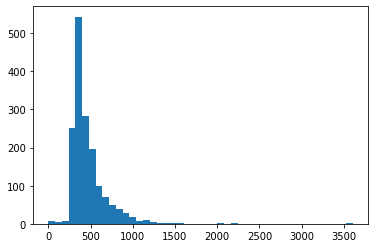

In [725]:
from utils import crea_capsulas
from utils import corta
partes, df = corta(partes, df, ini, fin)
d_summary = crea_capsulas(partes, df, lmin=300, lmax=999)

In [726]:
from utils_base import json_read, json_save
from utils import get_next_id_available
id_free = get_next_id_available()
dic_fake[i_book]["nCapitulos"] = len(d_summary)
dic_fake[i_book]["min"] = ini
dic_fake[i_book]["max"] = fin
dic_fake[i_book]["idioma"] = lang
dic_fake[i_book]["libroId"] = id_free  # libre en la base de datos

d_summaries = json_read(SUMMARIES_JSON)
title = dic_fake[i_book]['title']
d_summaries[title] = dic_fake[i_book]
json_save(d_summaries, SUMMARIES_JSON)

iteración 1
iteración 2
Hemos terminado. Hay 256 libros
El siguiente id disponible es 256
** Guardado los datos  en data_med/summaries.json


# Inserción Summary (Back4app)

In [727]:
from utils import upload_lib_summary
d_sum = d_summaries[title]
upload_lib_summary(d_sum)

** Subiendo libro 256 Los Miserables
{'objectId': 'bkHw5eKIM6', 'createdAt': '2023-10-17T09:06:28.175Z'}


# Inserción Cápsulas (Mongo)

In [728]:
if db is None:
    from utils_mongo import get_db, get_colls
    print('db no definida')
    db = get_db()
    c_lib, c_lib_sum = get_colls(db)
else:
    print('db ya definida')
# preparamos los json para subir masivamente
# tienen que tener los campos: texto, autor, nCapitulo, nLibro, titulo
final = []
autor = d_sum['author']
titulo = d_sum['title']
nLibro = d_sum['libroId']
for i, d_text in d_summary.items():
    d_uno = {'texto': d_text['texto'], 'autor': autor, 'nCapitulo': i, 'nLibro': nLibro, 'titulo': titulo}
    final.append(d_uno)
res = c_lib.insert_many(final)
len(res.inserted_ids)

db ya definida


1626

# Imagen 

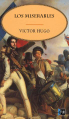

In [729]:
if img.size[0] > 700:
    img = img.reduce(2)
img.reduce(4)


In [730]:

from utils_images import crop
from ipywidgets import interactive, fixed
u = interactive(crop, f=(0.1, 1, 0.05),
                sx=(1, int(img.size[0] * .5)),
                sy=(1, int(img.size[1] * .9)),
                img=fixed(img))
# u
u

interactive(children=(FloatSlider(value=0.55, description='f', max=1.0, min=0.1, step=0.05), IntSlider(value=6…

In [731]:
si = u.result.size[0]
a = 200
b = min(si, 2 * a)
im_low = u.result.resize((a, a))
im_hi = u.result.resize((b, b))

# im_low
# la insertaremos mano luego
# https://parse-dashboard.back4app.com/apps/a8b7aa27-c240-42d5-9567-d95a43ba4b8f/browser/librosSum
base = 'data_out/_images/{}/{}.jpg'
im_low.save(base.format('low', titulo))
im_hi.save(base.format('hi', titulo))